# Import Packages

In [2]:
# Autoreload
%load_ext autoreload
%autoreload 2

# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Data Ingestion

In [3]:
# Raw Data
RAW_DATA_FILEPATH = "../data/raw/raw-stroke-data.csv"

df_stroke = pd.read_csv(RAW_DATA_FILEPATH)
df_stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
# Statistical values for numerical colunns

df_stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
# Statistical values for categorical colunns

df_stroke.describe(exclude=np.number)

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


# Data Cleansing

## Drop Columns

In [7]:
# Drop irrelevant columns

df_stroke.drop(columns = ["id"], inplace = True)
df_stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Remove Missing Values

In [8]:
# Check missing values

def missing_values_summary(df):
    missing_counts = df.isnull().sum()
    total_count = df.shape[0]  # Total number of rows in the DataFrame

    missing_df = pd.DataFrame({'Column': missing_counts.index, 'Missing Count': missing_counts.values})
    missing_df['Missing Percentage'] = (missing_df['Missing Count'] / total_count) * 100

    return missing_df

missing_values_summary(df_stroke)

,Column,Missing Count,Missing Percentage
0,gender,0,0.000000
1,age,0,0.000000
2,hypertension,0,0.000000
3,heart_disease,0,0.000000
4,ever_married,0,0.000000
5,work_type,0,0.000000
6,Residence_type,0,0.000000
7,avg_glucose_level,0,0.000000
8,bmi,201,3.933464
9,smoking_status,0,0.000000


In [9]:
df_stroke.dropna(inplace = True)

missing_values_summary(df_stroke)

,Column,Missing Count,Missing Percentage
0,gender,0,0.0
1,age,0,0.0
2,hypertension,0,0.0
3,heart_disease,0,0.0
4,ever_married,0,0.0
5,work_type,0,0.0
6,Residence_type,0,0.0
7,avg_glucose_level,0,0.0
8,bmi,0,0.0
9,smoking_status,0,0.0


## Drop Duplicates 

In [10]:
# Drop duplicated columns

print(f"Number of duplicated rows before = {df_stroke.duplicated().sum()}")

df_stroke = df_stroke.drop_duplicates()

print(f"Number of duplicated rows after = {df_stroke.duplicated().sum()}")

Number of duplicated rows before = 0
Number of duplicated rows after = 0


## Drop Rows

In [11]:
df_stroke.gender.value_counts()

gender
Female    2897
Male      2011
Other        1
Name: count, dtype: int64

In [12]:
# Remove "other" gender

df_stroke = df_stroke[df_stroke['gender'] != 'Other']
df_stroke.gender.value_counts()

gender
Female    2897
Male      2011
Name: count, dtype: int64

# Exploratory Data Analysis

## Distribution Numerical Columns

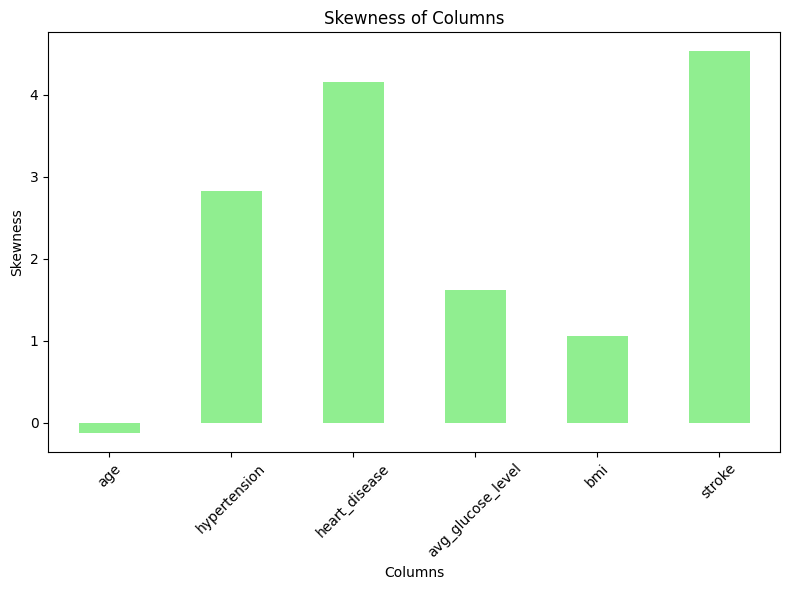

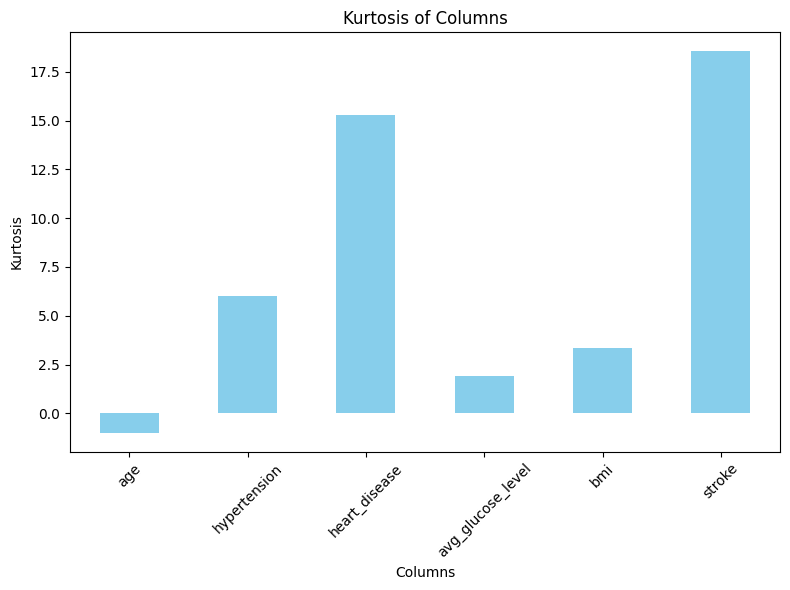

In [13]:
# Checking Skewness and Kurtosis

df_num = df_stroke.select_dtypes(exclude = ['object'])

# Plotting skewness values
skewness = df_num.skew()

plt.figure(figsize=(8, 6))
skewness.plot(kind='bar', color='lightgreen')
plt.title('Skewness of Columns')
plt.xlabel('Columns')
plt.ylabel('Skewness')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting kurtosis values
kurtosis_values = df_num.kurtosis()

plt.figure(figsize=(8, 6))
kurtosis_values.plot(kind='bar', color='skyblue')
plt.title('Kurtosis of Columns')
plt.xlabel('Columns')
plt.ylabel('Kurtosis')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

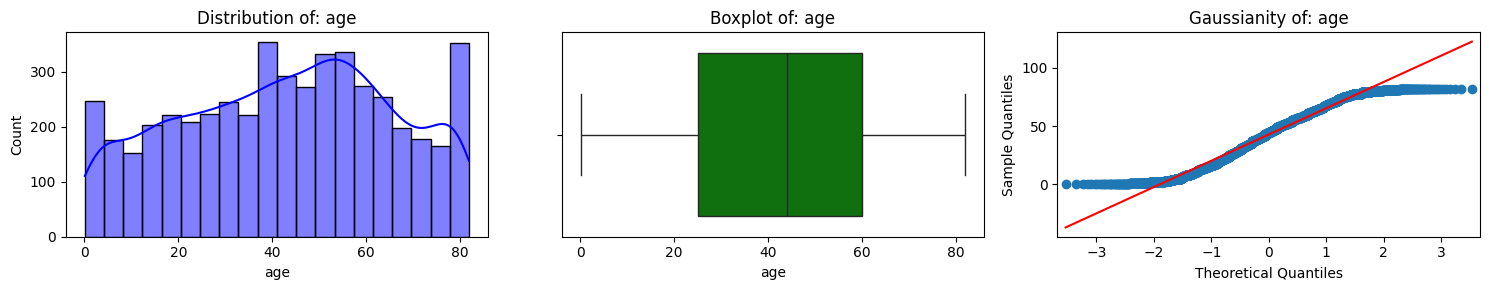

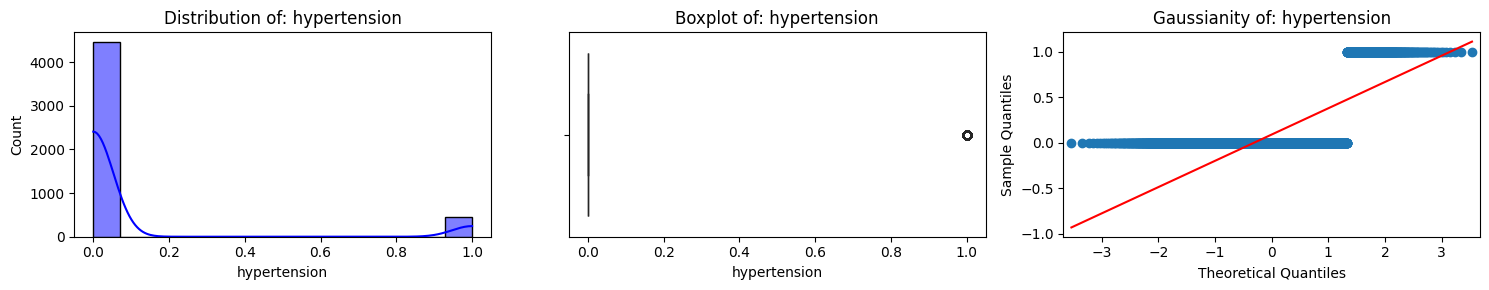

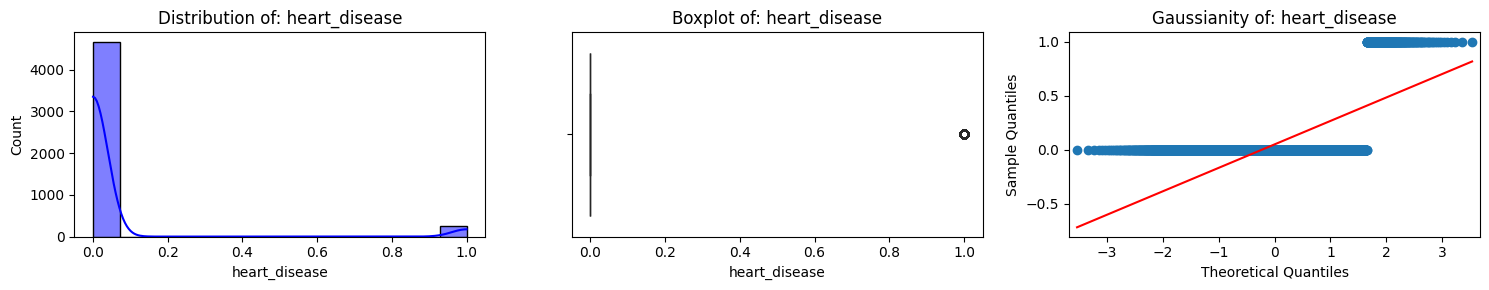

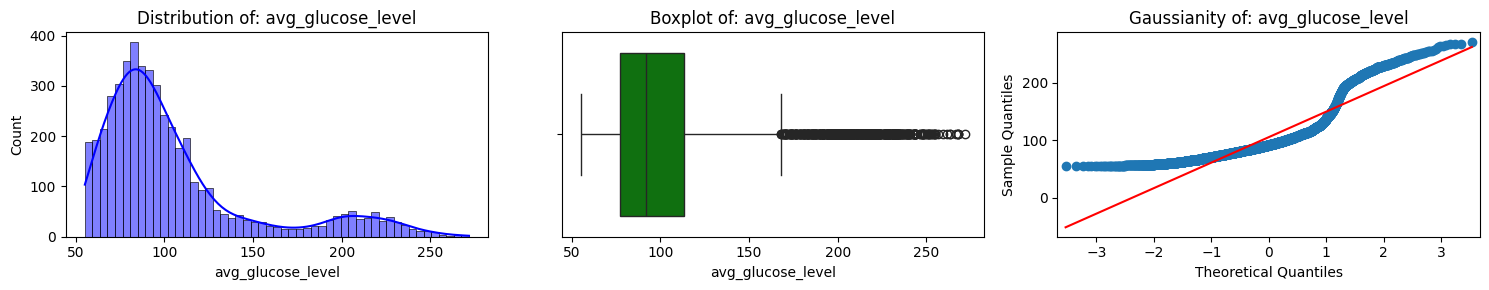

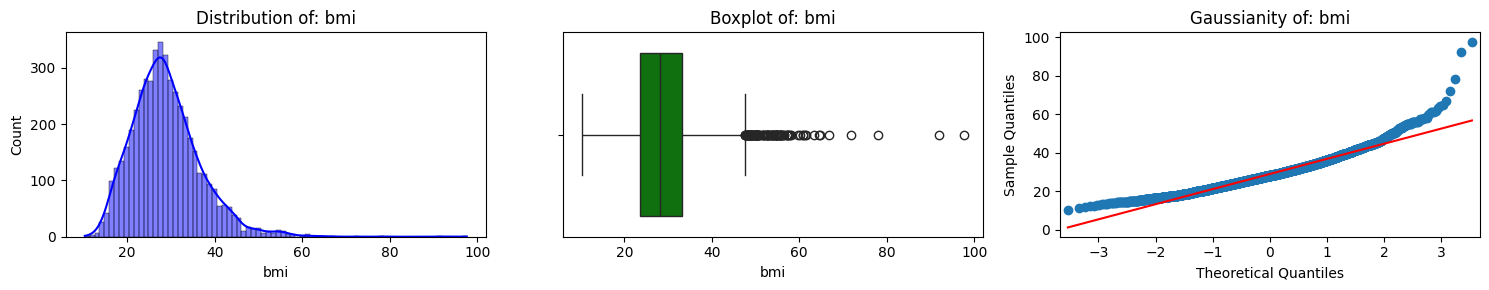

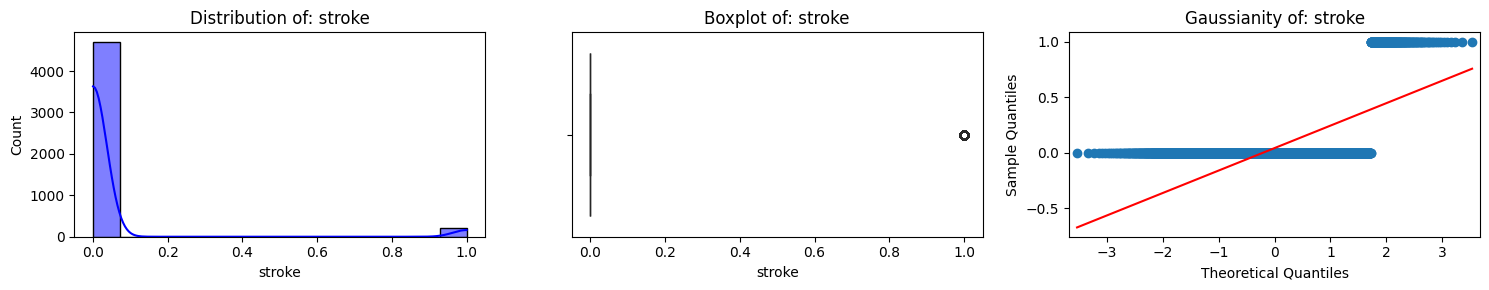

In [14]:
# Distribution

for numerical_feature in df_num.columns:
    
    # Creating three subplots per numerical_feature
    fig, ax =plt.subplots(1,3,figsize=(15,3))
        
    # Histogram to get an overview of the distribution of each numerical_feature
    ax[0].set_title(f"Distribution of: {numerical_feature}")
    sns.histplot(data=df_num, x=numerical_feature, kde=True, ax=ax[0], color='blue')
    
    # Boxplot to detect outliers
    ax[1].set_title(f"Boxplot of: {numerical_feature}")
    sns.boxplot(data=df_num, x=numerical_feature, ax=ax[1], color='green')
    
    # Analyzing whether a feature is normally distributed or not
    ax[2].set_title(f"Gaussianity of: {numerical_feature}")
    qqplot(df_num[numerical_feature], line='s', ax=ax[2], color='orange')
    
    plt.tight_layout()
    plt.show()

## Distribution Categorical Columns

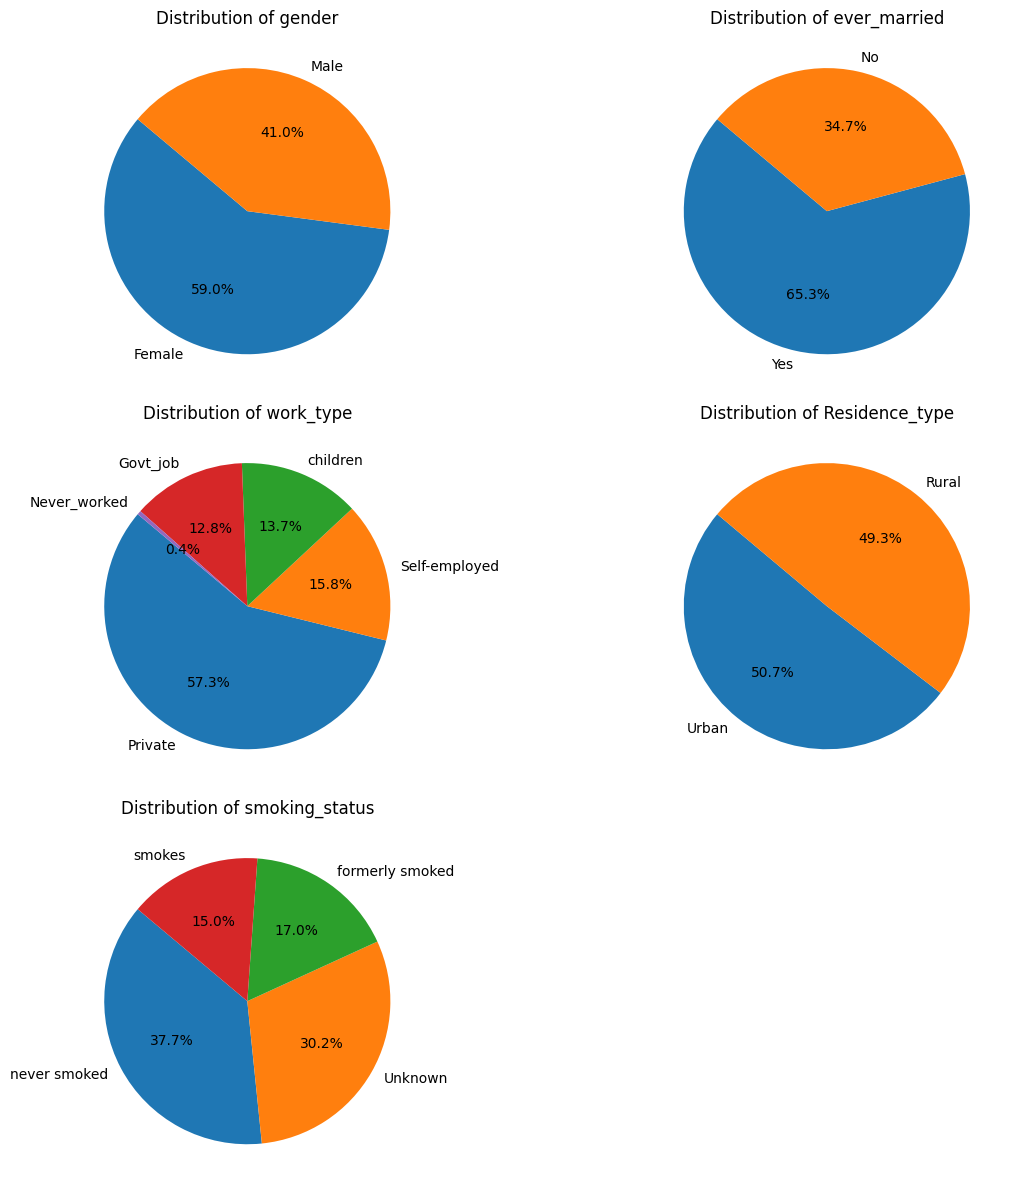

In [15]:
# Selecting categorical columns for pie charts
categorical_columns = list(df_stroke.select_dtypes(include=['object']).columns)

# Determine the number of rows and columns for subplots
num_cols = 2
num_rows = (len(categorical_columns) + num_cols - 1) // num_cols

# Create subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, num_rows * 4))

# Flatten axs for easier iteration if necessary
axs = axs.flatten()

# Plotting pie charts for each categorical column
for i, col in enumerate(categorical_columns):
    # Count the occurrences of each category
    category_counts = df_stroke[col].value_counts()
    
    # Plotting pie chart within Seaborn subplots
    axs[i].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
    axs[i].set_title(f'Distribution of {col}')

# Hide any unused subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

## Correlation 

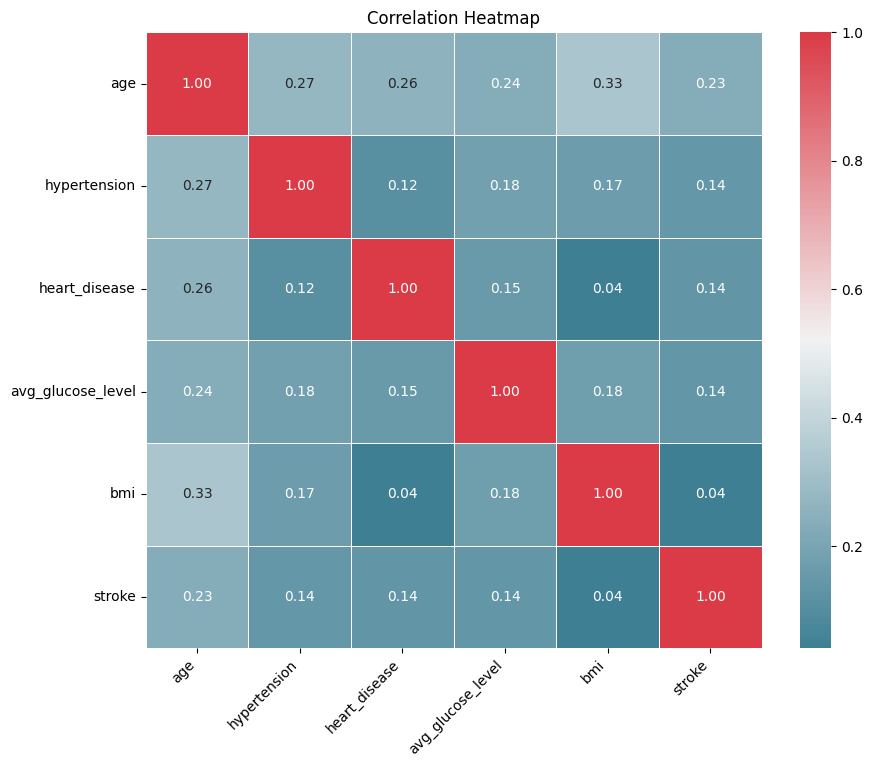

In [16]:
# Plot correlations

plt.figure(figsize=(10, 8))
plt.title('Correlation Heatmap')
plt.xticks(rotation=45, ha='right')

# Create a custom color palette
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Plot the correlation heatmap
sns.heatmap(df_stroke.corr(numeric_only=True), annot=True, cmap=cmap, fmt=".2f", linewidths=0.5, square=True)

plt.show()

## Covariance

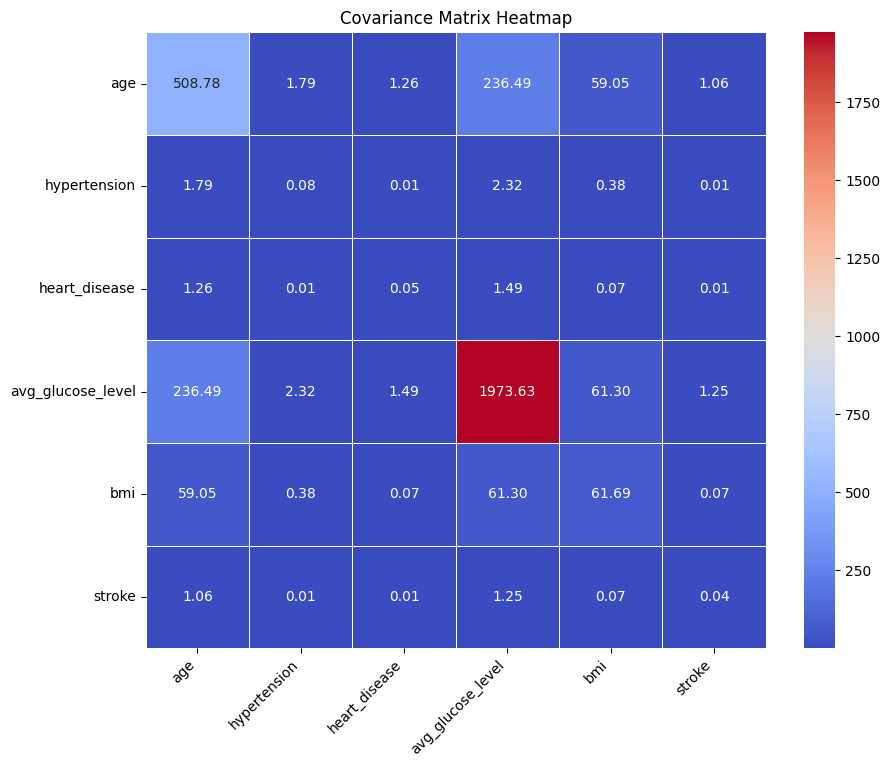

In [17]:
# Plot covariance

# Calculate the covariance matrix
cov_matrix = df_stroke.cov(numeric_only=True)

# Plot the covariance heatmap
plt.figure(figsize=(10, 8))
plt.title('Covariance Matrix Heatmap')
plt.xticks(rotation=45, ha='right')

sns.heatmap(cov_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

plt.show()

## Bivariate Analysis

### Gender vs. Stroke 

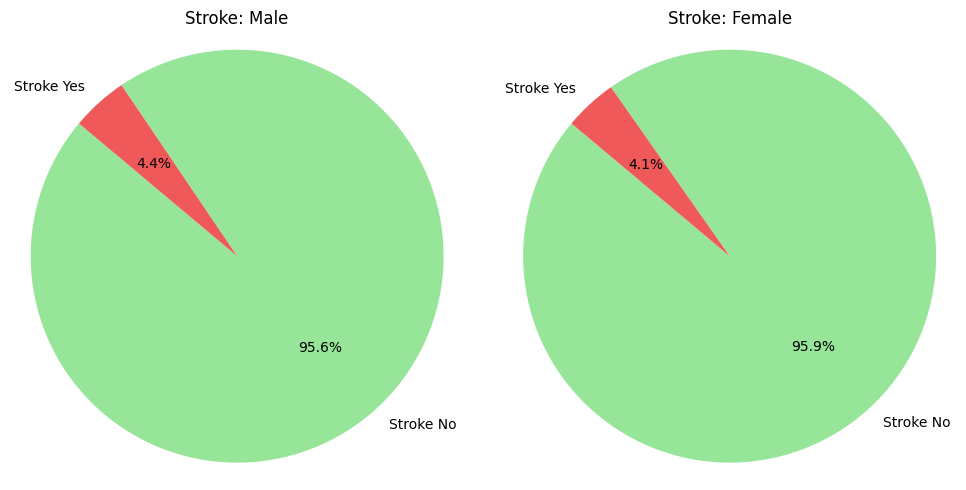

In [18]:
# Get unique values in 'gender' column
unique_gender = df_stroke['gender'].unique()

# Define custom colors for the pie charts
colors = ['#96E599', '#EF5959']

# Calculate the number of subplots based on the number of unique geographies
num_plots = len(unique_gender)

# Custom labels for the pie charts
labels = ['Stroke No', 'Stroke Yes']

# Create subplots for each unique gender
fig, axs = plt.subplots(1, num_plots, figsize=(5 * num_plots, 5))

# Plot pie charts for each unique gender
for i, gen in enumerate(unique_gender):
    gen_df = df_stroke[df_stroke['gender'] == gen]
    gen_counts = gen_df['stroke'].value_counts()

    # Plotting pie chart with custom labels and colors in the respective subplot
    axs[i].pie(gen_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
    axs[i].set_title(f'Stroke: {gen}')
    axs[i].axis('equal')  

plt.tight_layout()
plt.show()

### Ever Married vs. Stroke 

In [19]:
df_stroke.ever_married.value_counts()

ever_married
Yes    3204
No     1704
Name: count, dtype: int64

In [20]:
df_stroke[df_stroke['ever_married'] == "Yes"].stroke.value_counts()

stroke
0    3018
1     186
Name: count, dtype: int64

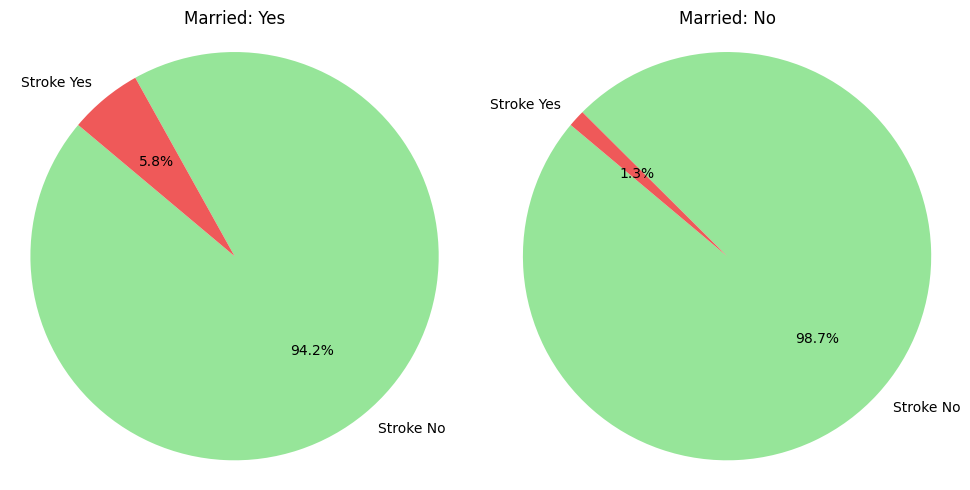

In [21]:
# Get unique values in 'married' column
unique_married = df_stroke['ever_married'].unique()

# Define custom colors for the pie charts
colors = ['#96E599', '#EF5959']

# Calculate the number of subplots based on the number of unique married
num_plots = len(unique_married)

# Custom labels for the pie charts
labels = ['Stroke No', 'Stroke Yes']

# Create subplots for each unique married
fig, axs = plt.subplots(1, num_plots, figsize=(5 * num_plots, 5))

# Plot pie charts for each unique married
for i, mar in enumerate(unique_married):
    mar_df = df_stroke[df_stroke['ever_married'] == mar]
    mar_counts = mar_df['stroke'].value_counts()

    # Plotting pie chart with custom labels and colors in the respective subplot
    axs[i].pie(mar_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
    axs[i].set_title(f'Married: {mar}')
    axs[i].axis('equal')  

plt.tight_layout()
plt.show()

### Age vs. Stroke 

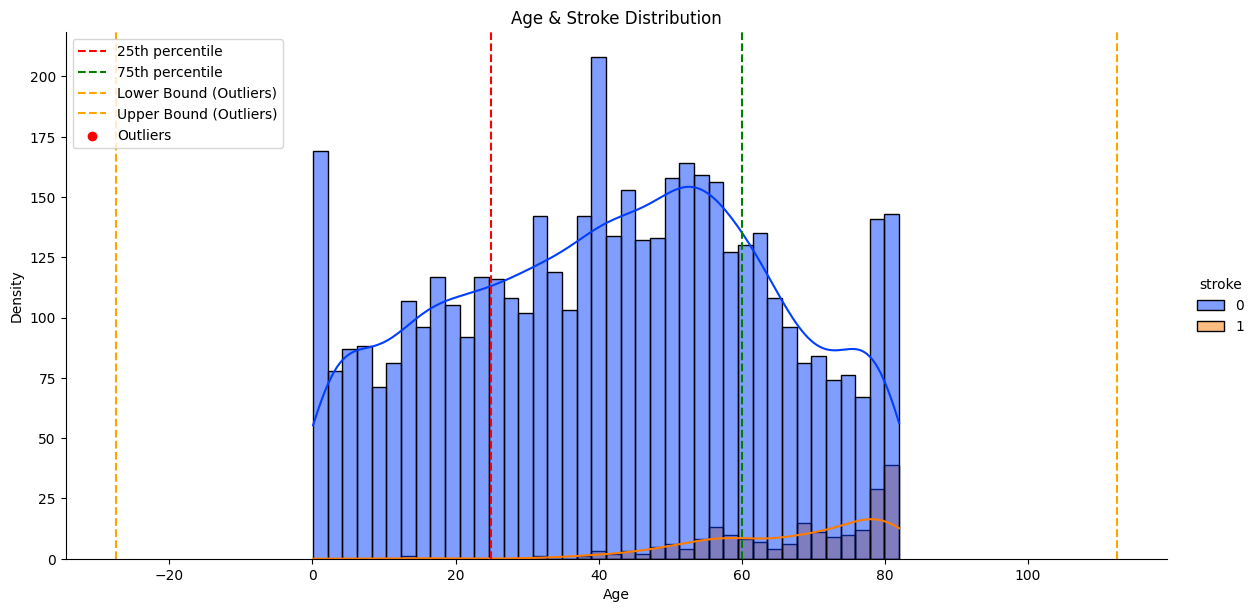

In [22]:
# Set color palette
palette = "bright"  
sns.set_palette(palette)

# Plotting the distribution of 'Age' using Seaborn displot
plot = sns.displot(data=df_stroke, x='age', hue='stroke', kde=True, bins=40, height=6, aspect = 2)

# Calculate 25th and 75th percentiles
percentiles_25 = np.percentile(df_stroke['age'], [25])
percentiles_75 = np.percentile(df_stroke['age'], [75])

# Find outliers using boxplot statistics
q1, q3 = np.percentile(df_stroke['age'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df_stroke[(df_stroke['age'] < lower_bound) | (df_stroke['age'] > upper_bound)]['age']



# Overlay the plot with vertical lines for percentiles and outliers
plt.axvline(x=percentiles_25[0], color='red', linestyle='--', label='25th percentile')
plt.axvline(x=percentiles_75[0], color='green', linestyle='--', label='75th percentile')

plt.axvline(x=lower_bound, color='orange', linestyle='--', label='Lower Bound (Outliers)')
plt.axvline(x=upper_bound, color='orange', linestyle='--', label='Upper Bound (Outliers)')
plt.scatter(outliers, np.zeros_like(outliers), color='red', marker='o', label='Outliers')

plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age & Stroke Distribution')  

plt.legend(loc = 'upper left')  
plt.show()

### Age vs. Stroke 

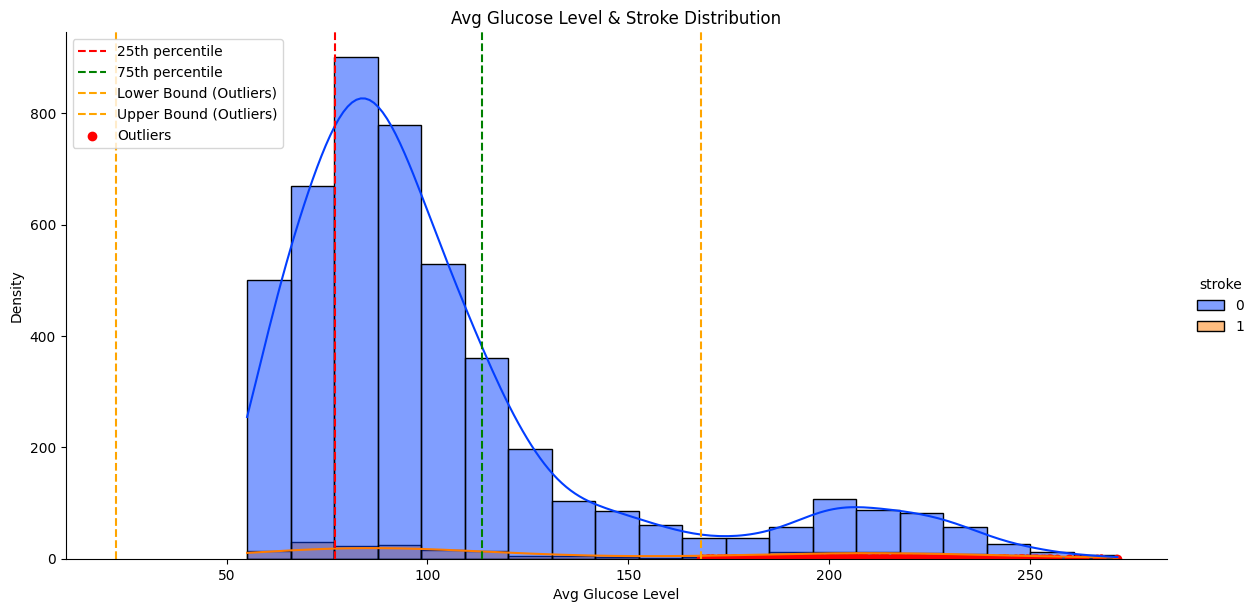

In [23]:
# Set color palette
palette = "bright"  
sns.set_palette(palette)

# Plotting the distribution of 'avg_glucose_level' using Seaborn displot
plot = sns.displot(data=df_stroke, x='avg_glucose_level', hue='stroke', kde=True, bins=20, height=6, aspect = 2)

# Calculate 25th and 75th percentiles
percentiles_25 = np.percentile(df_stroke['avg_glucose_level'], [25])
percentiles_75 = np.percentile(df_stroke['avg_glucose_level'], [75])

# Find outliers using boxplot statistics
q1, q3 = np.percentile(df_stroke['avg_glucose_level'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df_stroke[(df_stroke['avg_glucose_level'] < lower_bound) | (df_stroke['avg_glucose_level'] > upper_bound)]['avg_glucose_level']



# Overlay the plot with vertical lines for percentiles and outliers
plt.axvline(x=percentiles_25[0], color='red', linestyle='--', label='25th percentile')
plt.axvline(x=percentiles_75[0], color='green', linestyle='--', label='75th percentile')

plt.axvline(x=lower_bound, color='orange', linestyle='--', label='Lower Bound (Outliers)')
plt.axvline(x=upper_bound, color='orange', linestyle='--', label='Upper Bound (Outliers)')
plt.scatter(outliers, np.zeros_like(outliers), color='red', marker='o', label='Outliers')

plt.xlabel('Avg Glucose Level')
plt.ylabel('Density')
plt.title('Avg Glucose Level & Stroke Distribution')  

plt.legend(loc = 'upper left')  
plt.show()

# Save clean dataframe

In [31]:
# Clean Data
CLEAN_DATA_FILEPATH = "../data/clean/clean-stroke-data.csv"

clean_df = df_stroke.to_csv(CLEAN_DATA_FILEPATH, index=False)

clean_df = pd.read_csv(CLEAN_DATA_FILEPATH)
clean_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
